# Graph Neural Network (GNN)

| property            | CNN                   | GNN                 |Spetral GNN|
|---------------------|-----------------------|---------------------|---------------------|
| type of graph       | grid graph (image)    | spatial graph       |spectral graph
| locality            | local receptive field | neighbors of vertex |global properties of filter|
| def of Conv         | feature space         | spatial/vertex/Fourier domain       |spectral/frequency domain|

- image can be viewed as grid graph, every pixel is a vertex


- 3 basic ideas of CNN can all be translated to graph

    1. local receptive fields: can't cleanly slide a convolution, center neighbors on a vertex
    
    2. shared weights in a filter
    
    3. pooling

# GNN Architecture

Graph Neural Network (GNN) Architecture:

1. Input Layer: Receives graph data (nodes, edges, and features)

2. Propagation Rule:

   a. Neighborhood Aggregation: Collects information from neighboring nodes

   b. Node Update: Updates node features based on aggregated information

3. Stacking Layers: Multiple layers can be stacked for deeper representation learning

4. Readout Layer: Aggregates node features into a graph-level representation (optional)

5. Output Layer: Produces the final output (e.g., classification, regression)

# graph notation

- $\mathcal{G} = (\mathcal{V}, \mathcal{E})$: Graph $\mathcal{G}$ with a set of nodes (vertices) $\mathcal{V}$ and a set of edges $\mathcal{E}$.

- number of nodes/examples: $|V|=n$, number of edges: $|E|=m$

- $u \in \mathcal{N}(v)$: The set of neighbors of target node $v$.

- $A \in \mathbb{R}^{n \times n}$: The adjacency matrix of the graph, $A(u, v)= w$ if edge $e: u \to v \in \mathcal{E}$, else $A(u, v)= 0$

- $X \in \mathbb{R}^{n \times F}$: The node feature matrix, where $F$ is node feature dimension.

- $x_v \in \mathbb{R}^{F}$: node feature of node $v$

- $E \in \mathbb{R}^{m \times D}$: The edge feature matrix, where $D$ is edge feature dimension.

- $\mathbf{e}_{u,v} \in \mathbb{R}^D$ is edge feature from source node $u$ to target node $v$

- $\mathbf{h}_v^{(l)} \in \mathbb{R}^p$: The hidden state of node $v$ at layer $l$, where $p$ is the hidden state dimension.

- $\mathbf{z}_v^{(l)} \in \mathbb{R}^q$: The output representation of node $v$ at layer $l$, where $q$ is the output dimension.

- $W^{(l)} \in \mathbb{R}^{p^{(l-1)} \times p^{(l)}}$: The learnable weight matrix at layer $l$.

- $\phi(\cdot)^{(l)}$: Message function at layer $l$ or $l$ th iteration

- $A^{(l)}(\cdot)$: The aggregation function at layer $l$.

- $\gamma(\cdot)^{(l)}$: The update function at layer $l$.

# pooling

## neighbor pooling

Neighbor Pooling:

- Mean-pooling: Compute new node features by averaging features of a node and its neighbors. 

    Widely used in Graph Convolutional Networks (GCNs).

- Sum-pooling: Compute new node features by summing up features of a node and its neighbors. 

    Commonly used in GraphSAGE (Graph Sample and Aggregative).

- Max-pooling: Compute new node features by taking element-wise maximum of features of a node and its neighbors. 

    Often used in GCN, GIN (Graph Isomorphism Network).

- Attention-pooling: Compute new node features by taking a weighted sum of features of a node and its neighbors, with weights determined by an attention mechanism. 

    Prominent in GATs (Graph Attention Networks).

- LSTM-aggregation: Compute new node features by processing the features of a node and its neighbors as a sequence using an LSTM. An ordering is defined for the neighboring nodes, and the LSTM generates an aggregated representation capturing the sequential patterns in the neighbor features. used in GraphSAGE.

| Method      | model        |Pros      | Cons      |
|-------------|-------------|---------------------------------------------------|--------------------------------------------------|
| Mean-Pooling | GCN|- Preserves node count<br>- Smooth representation | - May lose important information                 |
| Sum-Pooling  | GraphSAGE|- Preserves node count<br>- Captures total influence | - Sensitive to node degree                      |
| Max-Pooling  | GAT|- Captures most salient features<br>- Robust to outliers | - Ignores less dominant features               |
| LSTM         || - Captures sequential information<br>- Flexible aggregation | - Requires node ordering<br>- not permutation invaria<br> - Slower computation |
| Attention    | GAT|- Learns weights for each neighbor<br>- Flexible aggregation | - More complex<br>- May require more training data |


## Graph Pooling


- Global mean-pooling: Compute the graph-level representation by averaging the node features across all nodes in the graph.

- Global sum-pooling: Compute the graph-level representation by summing the node features across all nodes in the graph.

- Global max-pooling: Compute the graph-level representation by taking the element-wise maximum of node features across all nodes in the graph.

- SortPooling: Sort the node features based on a specific criterion, concatenate them, and then apply a 1D convolution to generate a graph-level representation.

- Set2Set: Use a set-to-set attention mechanism to aggregate information from all nodes in the graph and generate a graph-level representation.

- DiffPool: Learn a differentiable hierarchical clustering of nodes in the graph and pool node features accordingly to generate a graph-level representation.

- Top-k pooling: Select the top-k nodes based on a ranking criterion (e.g., node degree or learnable node scores) and pool their features to generate a graph-level representation.

| Method          | Pros                                                           | Cons                                                         | Commonly used models |
|-----------------|----------------------------------------------------------------|--------------------------------------------------------------|----------------------|
| Global mean-pooling | Simple, efficient, and easy to implement                    | Ignores graph structure, sensitive to graph size changes | GCN, GraphSAGE       |
| Global sum-pooling  | Simple, efficient, and easy to implement                    | Ignores graph structure, sensitive to graph size changes | GCN, GraphSAGE       |
| Global max-pooling  | Simple, efficient, and easy to implement                    | Ignores graph structure, sensitive to graph size changes | GCN, GraphSAGE       |
| SortPooling        | Considers the node order, captures local structure          | Sorting and concatenation can be computationally expensive | -                    |
| Set2Set            | Order-invariant, captures complex relationships in the graph | Requires more computation due to the attention mechanism  | -                    |
| DiffPool           | Hierarchical, learns node clustering, captures multi-scale information | Higher computational complexity, requires learning node assignments | -                    |
| Top-k pooling      | Selects most informative nodes, reduces computation         | Requires a ranking criterion, may lose information from lower-ranked nodes | SAGPool, Graph U-Nets |


# message passing

node feature of node $v$ at $l$ th layer is:

$$
\mathbf{h}_v^{(l)} = \gamma^{(l)} \left( \mathbf{h}_v^{(l-1)}, A^{(l)}\left(\phi^{(l)}\left(\mathbf{h}_v^{(l-1)}, \mathbf{h}_u^{(l-1)},\mathbf{e}_{u,v}\right)\right)\right)
$$

Message passing is a general framework for applying convolutional operation over irregular graph

updates node representations by exchanging and aggregating information between neighboring nodes in a graph. 

The message-passing process is performed **iteratively for a fixed number of layers** $L$ or until convergence. 

Through multiple layers of message passing, GNN can capture more extensive and complex neighborhood structures, learn hierarchical and long-range patterns in the graph data. learn to leverage the graph structure and the local connectivity patterns of nodes to generate powerful node embeddings or predictions.

Many GNN models, such as Graph Convolutional Networks (GCNs), GraphSAGE, and Graph Attention Networks (GATs), are specific instances of the message-passing framework, each with their own unique design choices for the message, aggregation, and update functions.

## components

- Message function $\phi(\cdot)^{(l)}$: computes a message from a source node's feature, the target node's feature, and edge feature connecting them (if applicable). 

    This function captures the information flow between neighboring nodes.

    must be differentiable function, e.g. MLP

- Aggregation function $A(\cdot)^{(l)}$: combines messages from all neighboring nodes of a target node into a single representation. 

    must be differentiable, **permutation invariant** function 排列不变: graph and node representations are the same regardless of how nodes are ordered in the adjacency matrix.

    Common functions include sum, mean, max, attention, LSTM (not permutation invariant), mix-hop

    **normalized aggregation**: avoid vertices with denser neighbors pass more message, result in one vertex dominates the graph, especially scale-free graph in social network. e.g. a celebrity has lots of followers, if you follow him, he will dominate your graph

- Update function $\gamma(\cdot)^{(l)}$: updates the target node's feature based on the aggregated message $m_{\mathcal{N}(v)}^{(l)}$ and its current feature $\mathbf{x}_i^{(l-1)}$. 

    must be differentiable function, e.g. MLP
    
    often involves non-linear transformations (e.g., using an activation function) and learnable parameters (e.g., weight matrices) to generate new node features that capture the local graph structure.


- Readout function (optional) $R(\cdot)$:  used when task is graph-level, such as graph classification. 

    All the node features or a subset of node features in the graph are combined to produce a fixed-size graph-level representation.

    can be max, mean, sum, or complex functions as set function, differentiable pooling, top-k, sort pooling.

## algorithm

the following steps are performed for all nodes in parallel:

1. Initialize node features: $\mathbf{h}_v^{(0)} = x_v$ for all nodes $v \in V$

2. For each layer $l = 1, 2, ..., L$:

   a. Message passing: computes a message from a source node's feature $\mathbf{h}_u^{(l-1)}$, the target node's feature $ \mathbf{h}_v^{(l-1)}$, and edge feature connecting them (if applicable) for all the neighbors of node $v$: 
   
   $$
   \forall u \in \mathcal{N}(v), m_u^{(l)} = \phi^{(l)}\left(\mathbf{h}_v^{(l-1)}, \mathbf{h}_u^{(l-1)},\mathbf{e}_{u,v}\right)=\sigma\left(W_{\text{self}}^{(l)}\mathbf{h}_v^{(l-1)} + W_{\text{neigh}}^{(l)} \mathbf{h}_u^{(l-1)} + W_{\text{edge}}^{(l)}\mathbf{e}_{u,v} \right)
   $$

   b. Aggregate: combine messages from all neighboring nodes to a single feature: 
   
   $$
   m_{\mathcal{N}(v)}^{(l)}=A^{(l)}\left ( \left\{ m_u^{(l)}, \forall u \in \mathcal{N}(v)\right\} \right )
   $$

   normalize aggregation (optional) based on node degree:

   $$
   m_{\mathcal{N}(v)}^{(l)} = \sum_{u \in \mathcal{N}(v) \cup \left\{ v\right\}} \frac{m_{\mathcal{N}(v)}^{(l)}}{\sqrt{D_u D_v}}
   $$

   c. Update: updates the target node's feature based on the aggregated message $m_{\mathcal{N}(v)}^{(l)}$ and its current feature $\mathbf{h}_v^{(l-1)}$: 
   
   $$
   \mathbf{h}_v^{(l)} = \gamma^{(l)}\left(\mathbf{h}_v^{(l-1)}, m_{\mathcal{N}(v)}^{(l)}\right)=\sigma \left({W}^{(l)}\left(\mathbf{h}_v^{(l-1)} \oplus m_{\mathcal{N}(v)}^{(l)}\right) \right) 
   $$
   
3. Obtain the final node embeddings: 

$$
\mathbf{z}_v^{(L)} = \mathbf{h}_v^{(L)},\forall v \in \mathcal{V}
$$

4. Readout (optional for graph-level tasks)

$$
r(G)=R\left(\left\{ \mathbf{z}_v^{(L)}, \forall v \in \mathcal{V}\right\}\right)
$$

# graph attention



<img src = 'https://production-media.paperswithcode.com/methods/Screen_Shot_2020-07-08_at_7.55.32_PM_vkdDcDx.png'/>

Graph Attention mechanism pay different attention to neighbor nodes in the aggregation step. 

can also have multi-head attention, mask-attention.

The algorithm can be described in two parts:

1. **Attention score for the edge from node $v$ to node $u$:**

   - Compute the raw attention score between nodes $u$ and $v$:

     $$e_{vu} = a\left ( W^{(l)}\mathbf{h}_u^{(l-1)}, W^{(l)}\mathbf{h}_v^{(l-1)} \right )$$

   - Normalize the raw attention scores using the softmax function:

     $$\alpha _{vu}  = \frac{\exp(e_{vu})}{\sum_{k \in \mathcal{N}(v)}\exp(e_{vk}) }$$
   
   The softmax operation ensures that the attention scores for node $v$ to its neighboring nodes sum up to 1: $\sum_{u \in \mathcal{N}(v)}\alpha_{u v} =1$

2. **Node feature update at node $v$:**

   $$\mathbf{h}_v^{(l)} = \sigma \left(\sum_{u \in \mathcal{N}(v)} {\color{Red} {\alpha _{vu}}} W^{(l)} \mathbf{h}_u^{(l-1)} \right)$$

   The node features are updated by aggregating the weighted neighboring features based on the computed attention scores.


$a$: The attention function, which computes the raw attention scores between nodes based on their features.

$\sigma(\cdot)$: The activation function, such as ReLU or Leaky ReLU, applied to the aggregated features.

$e_{vu}$: The raw attention score between nodes $u$ and $v$, computed using the attention function.

$\alpha_{vu}$: The normalized attention score between nodes $u$ and $v$.

$W^{(l)}$: The learnable weight matrix for layer $l$ in the GNN.

$\mathcal{N}(v)$: The set of neighbors of node $v$.

$h_u^{(l-1)}$: The feature representation (embedding) of node $u$ at layer $l-1$.

$h_v^{(l-1)}$: The feature representation (embedding) of node $v$ at layer $l-1$.

$h_v^{(l)}$: The updated feature representation of node $v$ at layer $l$.

# DiffPool

<img src = 'https://production-media.paperswithcode.com/methods/84559c03-38ca-4cb2-bf0c-9b9ba1e288b6.png' />

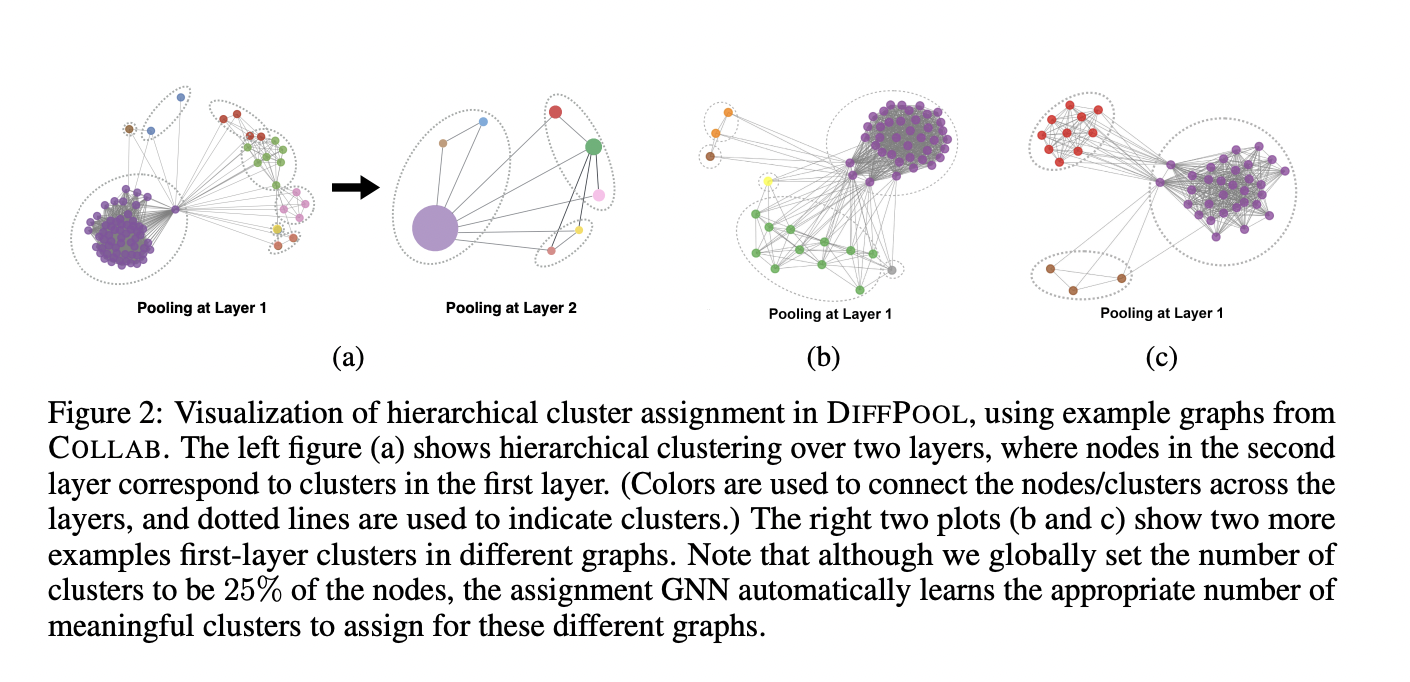

[DiffPool](https://arxiv.org/abs/1806.08804)  aims to learn hierarchical representations of graphs by using a differentiable graph pooling operation. 

1. **Graph Convolution:** 

   $$
   Z^{(l)} = \text{GNN}^{(l)}_{\text{embed}}(A^{(l)}, X^{(l)})
   $$

   embedding matric $Z^{(l)}$ for the cluster nodes is computed by applying standard GNN layer $\text{GNN}^{(l)}_{\text{embed}}$ to input cluster node feature $X^{(l)}$ and coarsened adjacency matrix $A^{(l)}$ 

2. **Differentiable Pooling:** 

   $$
   S^{(l)} = \text{softmax}\left(\text{GNN}^{(l)}_{\text{pool}}(A^{(l)}, X^{(l)})\right) \in \mathbb{R}^{n_{l} \times n_{l+1}}
   $$

   In order to pool the graph into coarser representations, DiffPool uses an assignment matrix $S^{(l)}$ to represent a probabilistic assignment of the input nodes to $n_{l+1}$ clusters
   
   assignment matrix is obtained by applying a pooling GNN layer and a softmax activation to input cluster node feature $X^{(l)}$ and coarsened adjacency matrix $A^{(l)}$. 

   $n_{l+1}$ is a pre-defined maximum number of clusters in layer $l+1$, and is a hyperparameter of model. Note that although we globally set the number of clusters to be 25% of the nodes, the assignment GNN automatically learns the appropriate number of meaningful clusters to assign for these different graphs.

3. **Coarsened Graph Representation:** 

   $$
   X^{(l+1)} = {S^{(l)}}^T Z^{(l)} \in \mathbb{R}^{n_{l+1}\times d}
   \\[1em]
   A^{(l+1)} = {S^{(l)}}^T A^{(l)} S^{(l)}\in \mathbb{R}^{n_{l+1}\times n_{l+1}}
   $$

   $X^{(l+1)}$ is new matrix of embeddings for each of clusters (nodes) in this coarsened graph, computed by aggregating node embeddings $S^{(l)}$ according to cluster assignment $S^{(l)}$

   $A^{(l+1)}$ is new coarsened adjacency matrix denoting the connectivity strength between each pair of clusters.


# task

## node-level


- Node Classification: assign a class label to each node in the graph. 

    $$
    \hat{\mathbf{y}}_v = \sigma (W_o \mathbf{z}_v^{(L)})
    $$

    e.g. classifying proteins in a protein-protein interaction network based on their functions.

    Classic model: Graph Convolutional Network (GCN)


- Node Regression: predict a continuous value associated with each node. 

    $$
    \hat{\mathbf{y}}_v = W_o \mathbf{z}_v^{(L)}
    $$

    e.g., predicting the influence of a user in a social network.

    Classic model: GraphSAGE

## edge-level


- Edge Classification: assigns a class label to each edge in the graph. 

    $$\hat{\mathbf{y}}_{uv} = \sigma(W_o (z_u^{(L)} \oplus z_v^{(L)}))$$

    e.g., predicting whether two proteins in a protein-protein interaction network physically interact or not.

    Classic model: Graph Attention Network (GAT)

- Edge Regression: predicts a continuous value associated with each edge. 

    $$\hat{\mathbf{y}}_{uv} = W_o (z_u^{(L)} \oplus z_v^{(L)})$$

    e.g.,, estimating the confidence score of a potential drug-target interaction in a drug-target interaction network.

    Classic model: Graph Isomorphism Network (GIN)

## graph-level


- Graph Classification: assign a class label to an entire graph. 

    $$\hat{\mathbf{y}}_G = \sigma(W_o r(G))$$

    e.g., classifying molecular graphs as active or inactive against a specific target in drug discovery.

    Classic model: Graph Convolutional Network with Global Pooling (GCN-GP)


- Graph Regression: predicts a continuous value associated with an entire graph. 

    $$\hat{\mathbf{y}}_G = W_o r(G)$$

    e.g., predicting the solubility of a molecule based on its molecular graph.

    Classic model: Graph Isomorphism Network with Readout Function (GIN-Readout)

# WL graph isomorphism Test 

Weisfeiler-Leman graph isomorphism test: a combinatorial algorithm used to test whether two given graphs are isomorphic 同构. 

- provides a benchmark for expressiveness of GNN models

- expressiveness: ability of a GNN model to capture structural differences between non-isomorphic graphs

- expressiveness <= WL test: GCN and GraphSAGE using most popular aggregators (mean, sum)

- limitation of WL test: false positives (graphs colored same may not be isomorphic)

## algorithm



The WL test iteratively refines a partition of the vertices of the graphs based on their local neighborhood structure. 

If the partitions of two graphs are different after a certain number of iterations, the graphs are considered non-isomorphic.

1. Initialize color labels for all nodes in both graphs, typically using node degrees or original node labels.

2. For each iteration:

   a. For each node, create a multiset containing the color labels of its neighbors.

   b. Sort and concatenate the multiset, and then append the node's current color label.

   c. Hash the concatenated string to generate a new color label for the node.

   d. Update the node's color label with the new one.

   e. Repeat steps a-d for all nodes in both graphs, stops when coloring is stable

3. Compare the final color label partitions of the two graphs:

   - If the partitions are identical, the graphs are considered possibly isomorphic.
   
   - If the partitions are different, the graphs are considered non-isomorphic.


# increase expressiveness of GNN

## powerful aggregation

MLP as update function

e.g. Graph Isomorphism Network (GIN): expressiveness > WL test

aggregation function introduces a learnable parameter $\epsilon^{(l)}$ determining the **relative importance of node's own features and aggregated neighbor features.**

update rule for features of node $v$ at layer $l$ is given by:

$$
h_v^{(l)} = \text{MLP}^{(l)}\left( \underset{\text{node feature}}{\underbrace{(1 + {\color{red}{\epsilon}}^{(l)}) h_v^{(l-1)}}} + \underset{\text{neighbors feature}}{\underbrace{m_{\mathcal{N}(v)}^{(l)}}} \right)
$$

## layer connectivity: skip connections

Skip connections can increase the expressiveness of graph neural networks (GNNs) by allowing information to bypass some of the layers in the network and propagate directly to deeper layers. 

This has several benefits:

Residual learning:

Skip connections enable residual learning, where the output of a layer is added to the input of a subsequent layer. This helps alleviate the problem of vanishing gradients and allows the network to learn deeper and more complex representations. The residual connection allows the network to bypass layers that may be less effective at capturing the relevant information and focus on the layers that are more informative.

Direct propagation of information:

Skip connections enable direct propagation of information from shallower layers to deeper layers. This allows the network to access and incorporate information from all levels of the network and capture both local and global information. Skip connections can also help preserve the spatial locality of the input data, which is important for many graph-related tasks.

Improved training:

Skip connections can improve the training of GNNs by reducing the likelihood of overfitting and increasing the stability of the training process. The residual connections help propagate gradients directly to shallower layers, which can help prevent the gradients from vanishing during backpropagation. This can also help prevent the model from getting stuck in local minima and improve the generalization performance.

## more FC layers

FC layers before and after GraphConv layers can increase the expressiveness of GNNs by allowing for more complex transformations of the input features and more flexible mappings to the output space. This can improve the ability of GNNs to capture the underlying structure of the data and make accurate predictions or classifications.


FC layers before GraphConv layers:

- By applying one or more FC layers to the original node features before the GraphConv layers, we can learn higher-level representations that capture more complex patterns and relationships between nodes. 

- These higher-level representations are then used as input to the GraphConv layers, which further refine the representations based on the local graph structure.

FC layers after GraphConv layers:

- By applying one or more FC layers after the GraphConv layers, we can further transform the learned representations to better fit the specific task or downstream application.

- For example, in node classification tasks, the FC layers can map the learned node representations to a probability distribution over the target classes. 

- In graph classification tasks, the FC layers can combine the node representations to generate a graph-level representation that captures the overall structure of the graph.



## augmentation

Graph augmentation (problem: too sparse/dense/insufficient connected)

- Subsampling (if too dense): randomly removing a portion of nodes or edges from the original graph to reduce its size.

- clustering (if too dense)

- Adding virtual nodes or edges (if too sparse): introducing new nodes or edges to the graph to encode additional information, such as cluster or community membership, or to represent missing information.

- Rewiring edges: randomly rewiring or adding edges to the original graph to create a new graph with a different structure.

- Graph perturbation: adding noise or perturbations to the original graph to simulate variations in the data.


Node feature augmentation:

- add new feature: node degree, unique identity, centrality measure (e.g., betweenness centrality, closeness centrality), topological feature (e.g., clustering coefficient, degree assortativity)


- Feature perturbation: adding noise or perturbations to the node features to simulate variations in the data.

# limitations of GNN

Scalability: GNNs can have difficulty scaling to large graphs due to the high computational and memory requirements for processing graph data.

**Over-smoothing**: As the number of GNN layers increases, node embeddings can become too similar, resulting in indistinguishable features for nodes and loss of useful information.

Graph heterogeneity: GNNs may struggle to handle graphs with different types of nodes and edges or with varying edge weights, which require specialized architectures and techniques.

Dynamic graphs: GNNs are not inherently designed for handling dynamic graphs with changing structures over time. Adapting GNNs for dynamic graphs often requires additional modifications or specialized models.

Inductive learning: While GNNs can generalize well to unseen nodes within a graph, they may struggle to generalize to entirely new graphs, especially when there is a significant difference in graph structure or size.

Interpretability: GNNs can be difficult to interpret, as they learn complex, high-dimensional embeddings for nodes and edges, and the reasoning behind predictions may not be easily explainable.

Training instability: GNNs can be sensitive to hyperparameter choices, initialization, and optimization methods, which can lead to unstable training and performance.

Handling higher-order structures: GNNs primarily operate on local neighborhood information, and may not effectively capture higher-order graph structures or global graph properties without additional techniques or modifications.